<a href="https://colab.research.google.com/github/ratthing/Documents/blob/master/Quokka_docs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

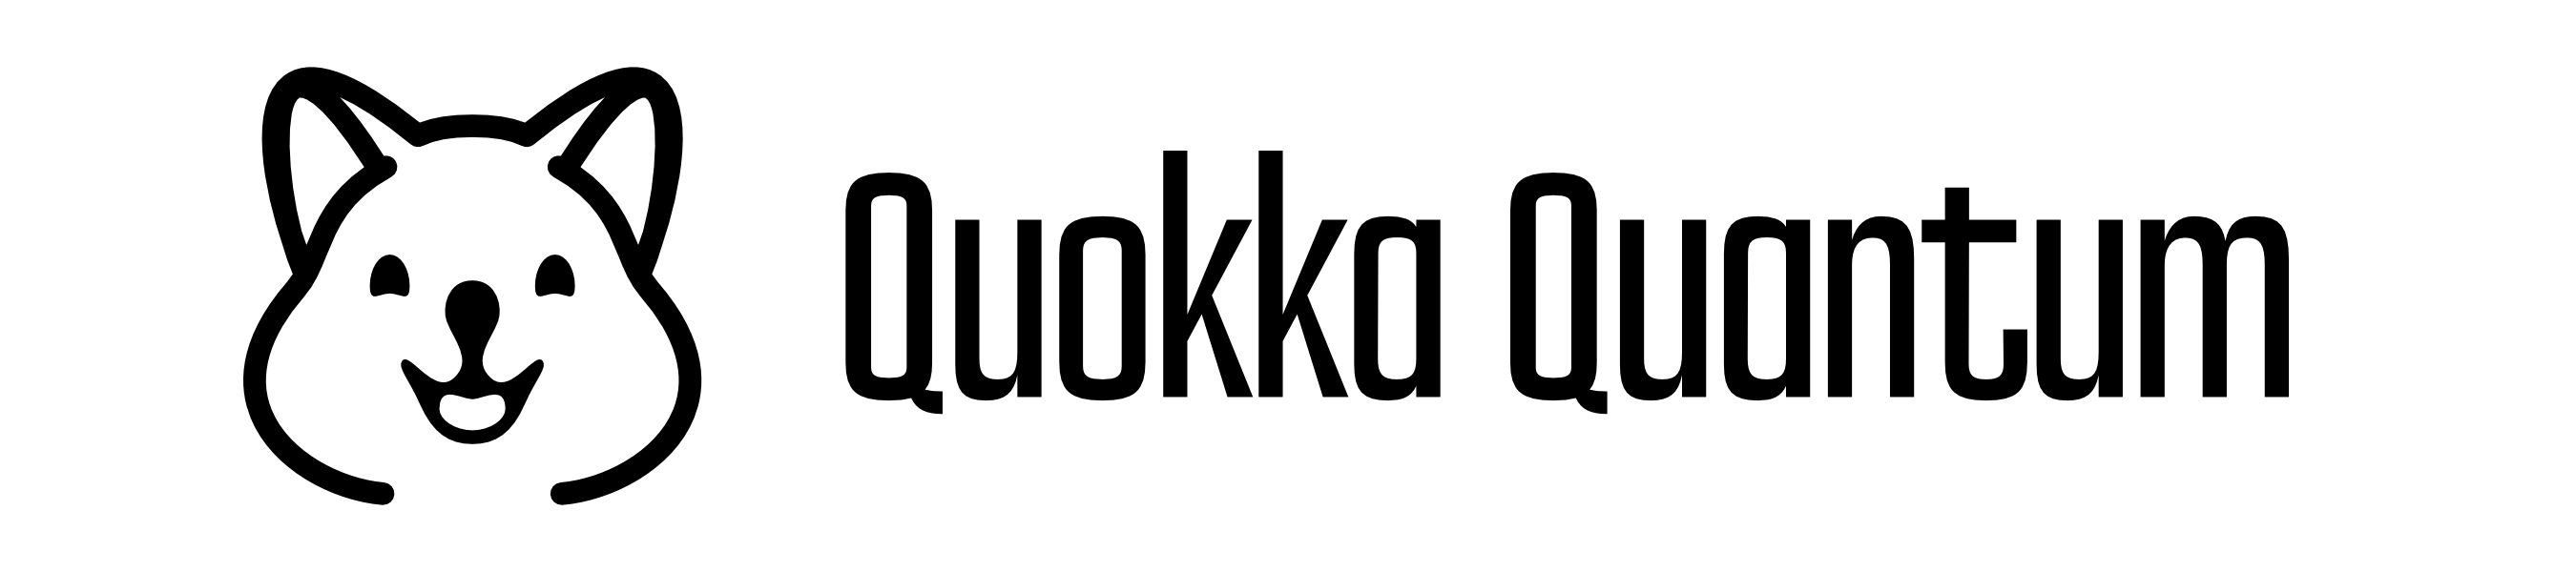

In [1]:
# Live documentation? So 21-century! (Run this cell)

# Data handling and communication
import numpy as np # For arrays and math
import os # Optional file uploading
import json  # For working with JSON (JavaScript Object Notation) data
import requests  # For making HTTP requests to the Quokka

# Suppressing warnings (optional)
from requests.packages.urllib3.exceptions import InsecureRequestWarning
requests.packages.urllib3.disable_warnings(InsecureRequestWarning)  # Disable warnings about insecure requests

# Using the Quokka
The easiest way to use Quokka is through the REST API, meaning you'll need to have a Quokka onboarded to use it and to run this *live* documentation!



In [2]:
# default Quokka address (change if you have your own!):
my_quokka = 'theq-add2cd'

# Pure Python

### Batch vs Non-batch mode
The client uses HTTP POST interface to invoke the functions of the simulator. The simulator provides two modes of operations: batch mode and non-batch mode.

In non-batch mode, the input a single operation to be performed and the output is a result of that operation.

In batch mode, an entire experiment starting from circuit creation, gates, measurement to circuit teardown is can be performed in one REST call. In this case, the input is a list of JSON documents and the output is a corresponding list of JSON documents with the results.

### Non-batch mode
The following Python code snippet provides an example of creating a quantum circuit using the REST API and performing a gate operation on the circuit and finally measurement when the interface is used in non-batch mode. All operations are invoked using the URL "http://{my_quokka}.quokkacomputing.com/qsim/perform_operation" when using the simulator in non-batch mode.

### Supported circuit operations

The following table provides a list of operations supported via the REST API with a brief description.

| Operation                                  | Description                   |
| -------------------------------------------|-------------------------------|
| create_circuit                             | Create a quantum circuit      |
| gate                                       | Invoke a gate call            |
| set_state                                  | Set the initial state of the circuit  |
| destroy_circuit                            | Destroy a quantum circuit     |
| measure                                    | Measure one or more qubits.   |
| measure_qubits                             | Measure one or more qubits and returns the qubit value.   |
| state_vector                               | Get the current state of the circuit  |
| qasm                                       | Runs a QASM script and returns the result |


All non-gate operations follow the JSON document format given below, illustrated using the example of create_circuit gate.
```
    {
        'operation': 'create_circuit',
        'num_qubits': 2
    }
```
For all operations where an error occurs, an error is returned in the json object of the response. For instance, an error in destroy_circuit call would result in
```
    {
        'operation': 'destroy_circuit',
        'result': False,
        'error_code': <number>,
        'error': 'error string'
    }
When no error occurs in the operation, the error string is set to string 'no error'.
The table below provides the input and output for all non-gate operations. Note that all input and output json documents have operation key which specifies the operation. This is omitted from the table.
```


| Operation            | Input                                        | Output                          | Comments|
|----------------------|----------------------------------------------|---------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------|
| create_circuit       | {'num_qubits': N}                            | {'result': 1}                   | Input specifies number of qubits in the circuit and<br>the output has the ID of the circuit thus created.|
| set_state            | {'register': 1, 'state': 0, 'complex_value': {'re': 1, 'im': 0}}   | {'result': true}| Input specifies the initial state as a complex number (1, 0) assigned to state# 0.<br>Output is a boolean value indicating success/failure.|
| destroy_circuit      | {'register': 2}                           | {'result': true}          | Input specifies the ID of the quantum circuit to destroy and<br>the output is a boolean value indicating success/failure.|
| measure              | {'register': 3, 'lq2m': {0, 5, 7}         | {'result': n}                   | Input specifies the circuit ID and the list of qubits to measure and<br>the output is a value between 0 - N-1 where N is the number of qubits in the circuit.|
| measure_qubits       | {'register': 3, 'lq2m': {0, 5, 7}         | {'result': n}                   | Input specifies the circuit ID and the list of qubits to measure and<br>the output is a value between 0 - N-1 where N is the number of qubits in the circuit.|
| state_vector         | {'register': 4}                           | {'result': [{'state': 5, 'binary_pattern': '101', 'complex_value':{'re': 1, 'im': 0}}]}  | Input specifies the circuit ID whose state is requested and <br> the output contains the list of non-zero states. <br>Each state has a state number, binary pattern for the state and the complex number for the state. |
| qasm                 | {'script;': "script in a string"             | {'result': [<result>]}          | Input specifies the QASM compliant script embedded in a json document and <br> the output contains the results of executing the script |

All gate operations follow the JSON document format given below, illustrated using the example of hadamard gate. Note that all gate operation will have an operation key which is set to 'gate'.
```
    {
        'operation': 'gate',
        'gate': 'hadamard',
        'q': 2,
        'theta': 0.35
    }
```
### Supported Gate operations
The table below provides a summary of gate operations supported through the REST API.

**Note:** The qubit parameters 'q', 'q_control', 'q_target' are always between [0, N) where N is the number of qubits in the circuit.

| Gate name | Parameters | Comments |
|-----------|------------|----------|
| hadamard  | 'q': 1 | 'q' specifies the qubit number. |
| xrot      | 'q': 1<br>'theta': 0.35 | theta is in radians and 'q' specifies the qubit number.|
| yrot      | 'q': 1<br>'theta': 0.35 | theta is in radians and 'q' specifies the qubit number.|
| zrot      | 'q': 1<br>'theta': 0.35 | theta is in radians and 'q' specifies the qubit number.|
| X         | 'q': 1 | 'q' specifies the qubit number. |
| Z         | 'q': 1 | 'q' specifies the qubit number. |
| XZ        | 'q': 1 | 'q' specifies the qubit numbers.|
| cnot      | 'q_control': 1<br>'q_target': 2<br>q_control' specifies the controlling qubit and 'q_target' is the target qubit.|
| cphase    | 'q_control': 1<br>'q_target': 2<br>'theta': 0.35 | 'q_control' specifies the controlling qubit and 'q_target' is the target qubit,<br> and theta is the angle in radians.|
| lerr      | 'q': 1 | 'q' specifies the qubit number, applies X, Z, or XZ based on a probability to simulate errors. |
| swap      | 'q1': 1, 'q2': 2 | 'q1', ;q2' specify the qubit numbers, applies 3 cnot gates in sequence. |

The following table provides a list of errors that can be returned by the REST API.

| ERROR                        | Numeric value | Comments |
|------------------------------|---------------|----------|
| NO_ERROR                     | 0             | Success  |
| INVALID_OPERATION            | 1             | The specified operation value is not valid |
| INVALID_GATE                 | 2             | The specified gate value is not valid |
| INVALID_OR_MISSING_PARAMETER | 3             | Invalid or missing parameters specified |
| OUT_OF_MEMORY                | 4             | The simulator has run out of memory |
| INTERNAL_ERROR               | 5             | Internal error |
| INVALID_JSON                 | 6             | Input JSON in POST request is malformed |
| INVALID_QASM                 | 7             | QASM script has syntax or sematic errors|



In [3]:
# create_ciruit (turn on your quantum computer for a qubit array between qubits = 1 and qubits = 30)
# Initial_state is a integer to initalise all qubit,
# most often initial_state = 0.

def create_circuit(qubits,initial_state):
    data = {
        'operation': 'create_circuit',
        'num_qubits': qubits
    }
    result = requests.post(req_str, json=data)
    json_obj = json.loads(result.content)
    reg_id = json_obj['result']

    data = {
        'operation': 'set_state',
        'register': reg_id,
        'state': initial_state,
        'complex_value': {'re': 1, 'im': 0}
    }
    result = requests.post(req_str, json=data, verify=False)
    return reg_id

# Gates.  gate_name and params are specified from the list above
# Gates only return 'True' and 'False' to indicate if they were successsfully applied
def gate(register_id, gate_name, params):
    data = {
        'operation': 'gate',
        'register': register_id,
        'gate': gate_name
    }
    for k in params.keys():
        data[k] = params[k]
    result = requests.post(req_str, json=data, verify=False)
    json_obj=json.loads(result.content)
    return json_obj['result']

# params contain an array of qubit numbers to measure, 'lq2m': [0,1,3] would measure qubits 0, 1 and 3 and return the
# corresponding 3-bit integer value from 0 to 7.
# concepually easiest is to measure qubits one-by-one, hence to measure qubit 4, 'lq2m': [4]
def measure_qubit(register_id, params):
    data = {
        'operation': 'measure',
        'register': register_id,
    }
    for k in params.keys():
        data[k] = params[k]
    result = requests.post(req_str, json=data, verify=False)

    json_obj = json.loads(result.content)
    return json_obj['result']

# Always call destroy_circuit to terminate simulation (turn off your QC)
def destroy_circuit(register_id):
  data = {
        'operation': 'destroy_circuit',
        'register': register_id
  }
  result = requests.post(req_str, json=data, verify=False)



In [4]:
# define the web address for non-batch operations
req_str = 'http://{}.quokkacomputing.com/qsim/perform_operation'.format(my_quokka)

# circuit_size defines the number of qubits
circuit_size = 1

# init sets the initial binary state of the computer (expressed as init = Integer)
init = 0
reg_id = create_circuit(circuit_size,init)
print("Simulation ID = ", reg_id,". The Quokka was initialised over", circuit_size, "qubits")

SSLError: HTTPSConnectionPool(host='theq-add2cd.quokkacomputing.com', port=443): Max retries exceeded with url: /qsim/perform_operation (Caused by SSLError(SSLCertVerificationError(1, "[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: Hostname mismatch, certificate is not valid for 'theq-add2cd.quokkacomputing.com'. (_ssl.c:1007)")))

In [ ]:
# Add the H gate
hgate = gate(reg_id,'hadamard', {'q': 0})

# Not necessary, but the Quokka should return a positive message
print(hgate)

In [ ]:
# Measure the (circuit_size) input qubits
measarr = []
for i in range(0,circuit_size): measarr.append(i)
c0 = measure_qubit(reg_id, {'lq2m': measarr})

print("The Quokka returned the following value over", len(measarr), "qubits: ", format(c0,"0"+str(circuit_size)+"b"))

destroy_circuit(reg_id)

### Batch mode
When the simulator is used in batch mode the following URL: http://{my_quokka}/qsim/perform_experiment is used. When using batch mode, all operations for an experiment are specified as a list of JSON documents (one document for each individual operation) and the result is also a list of JSON documents. Another key difference between batch and non-batch mode is the specification of "register" parameter in the input JSON document. In non-batch mode, it must be specified but in batch mode it is omitted since the register value is derived from the create_circuit operation. The following example illustrates the polarization experiment invoked in batch mode.
```
[
    {
        'operation': 'create_circuit',
        'num_qubits': 1
    },
    {
        'operation': 'set_state',
        'state': 1,
        'complex_value': {'re': 1, 'im': 0}
    }
    {
        'operation': 'gate',
        'gate': 'xrot',
        'q': 0,
        'theta': 1.3
    }
    {
        'operation': 'gate',
        'gate': 'xrot',
        'q': 0,
        'theta': 1.0
    }
    {
        'operation': 'measure_qubit',
        'l2qm': [0]
    }
    {
        'operation': 'destroy_circuit'
    }
]
```


# QASM Support
The following table provides the mapping between the gates and their names supported the Q simulator and the QASM scripting language.

| TheQ	   | QASM	 | Comments |
|----------|-------|----------|
| xrot	   | rx	   | Rotation around X-axis    |
| yrot	   | ry	   | Rotation around Y-axis    |
| zrot	   | rz	   | Rotation around Z-axis    |
| X  	   | x     | Pauli-gate bit flip       |
| Z  	   | z     | Pauli-gate phase flip                   |
| XZ	   | y	   | Pauli-gate bit+phase flip               |
| cnot	   | cx	   | Controlled NOT gate                     |
| swap	   | swap  | ```gate swap a,b { cx a,b; cx b,a; cx a,b; }``` |
| lerr	   | lerr  | Apply with probability 0 < reg.err < 1, either X, Z or XZ to a qubit when time = 1.<br>Simulate errors in the circuit and it is called after every application of a gate (either single or two qubits) |
| cphase   | cphase| ```gate cz a,b { h b; cx a,b; h b; }``` |
| hadamard | h     | Hadamaard gate                          |
| U        | U     | U gate - composition of 3 rotations ZYZ |

A QASM script is executed in the simulator by invoking the http://host:port/qsim/qasm URL. The body of the POST request contains the script to execute in the following format.
```
{
    'script': <qasm script>,
    'count': N,
    'state_vector': false
}
```

The result of a QASM script execution is the value stored in the classical registers (creg) from a measure operation. This is returned in a JSON document as follows.
```
{
    'error_code': 0,
    'error': 'no error',
    'result': {'c': [[0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1]] }
}
```
The above example assumes that the QASM scripts has a ```creg c[3]``` declaration and the script itself is run 4 times (count = 4). The JSON document follows a similar structure to earlier examples in that they have a "result," "error_code," and "error" items. Within the "result" item, a dictionary is returned. The keys of this dictionary correspond to the names of the classical registers in the QASM script and the value is an array whose length is equal to the number of times the script is executed.


## QASM example


In [ ]:
# QASM is text based, so we'll use strings here in Python

# Every QASM files starts the same

program = """
OPENQASM 2.0;
"""

# Next, we specify the number of qubits using the command "qreg q[  ];"

program += """
qreg q[1];
"""

# Finally, the initialization is complete by specifying the classical
# registers where the results of measurement are stored
# this is done using "creg c[  ];"

program += """
creg c[1];
"""

# To apply a quantum instruction, or "gate", use the pattern "gate q[ ];"
# We want to apply "hadamard", which is "h" in the QASM language

program += """
h q[0];
"""

# To read a qubit, we use "measure q[ ] -> c[ ]"
# This QASM command says measure a qubit and store the bit value
# in a classical register

program += """
measure q[0] -> c[0];
"""

The above is a "quantum coin" program that should return a random bit. Below we will wrap it up in a JSON object and send it to the Quokka.

In [ ]:
# create dictionary
data = {
    'script': program,
    'count': 10
}

# define the correct Quokka QASM address
req_str_qasm = 'http://{}.quokkacomputing.com/qsim/qasm'.format(my_quokka)

# send the request
result = requests.post(req_str_qasm, json=data, verify=False)

# load the object into a Python dictionary
json_obj = json.loads(result.content)

# print the keys and entries
print(json_obj)